In [1]:
file_list = ['D','Hi-C','SLICE','SPRITE']

In [2]:
import pandas as pd
%matplotlib inline

import venn

insulator-insulator
D
Hi-C
SLICE
SPRITE


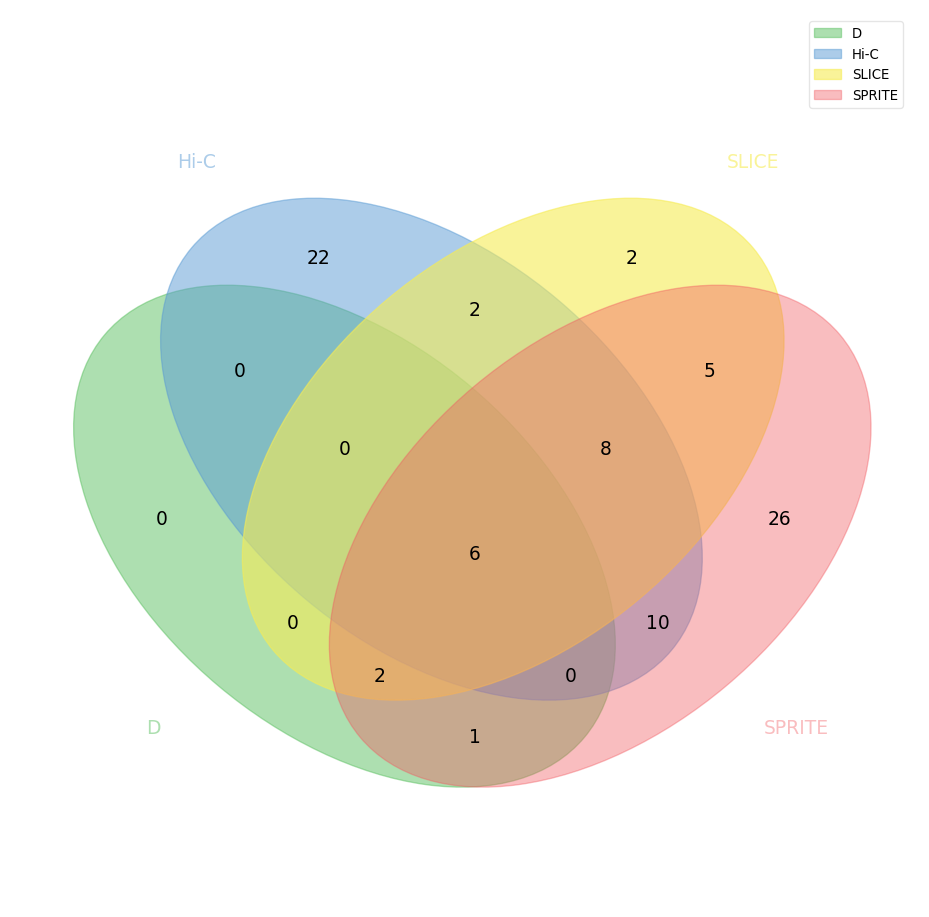

{'SP2-CTCF', 'CTCFL-RXRA', 'CTCFL-GCR', 'CTCFL-SP2', 'RXRA-CTCF', 'GCR-CTCF'}
insulator-promoter
D
insulator-enhancer
D
Hi-C
SLICE
SPRITE


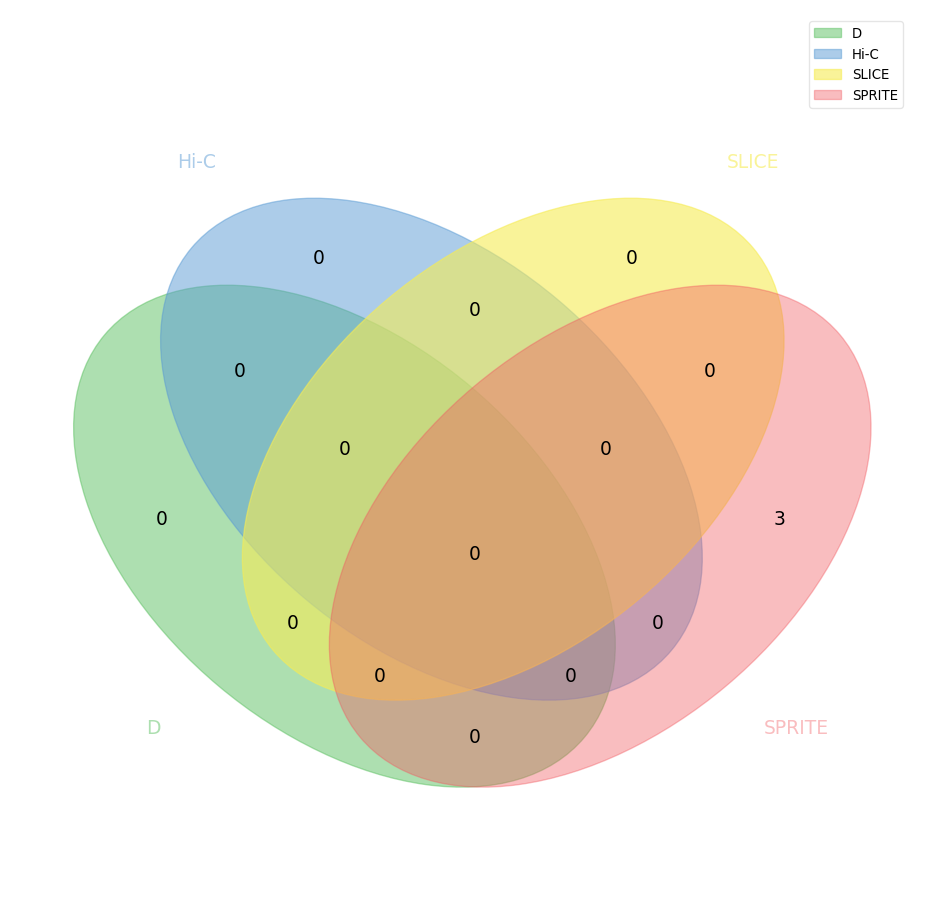

set()
promoter-insulator
D
Hi-C
SLICE
SPRITE


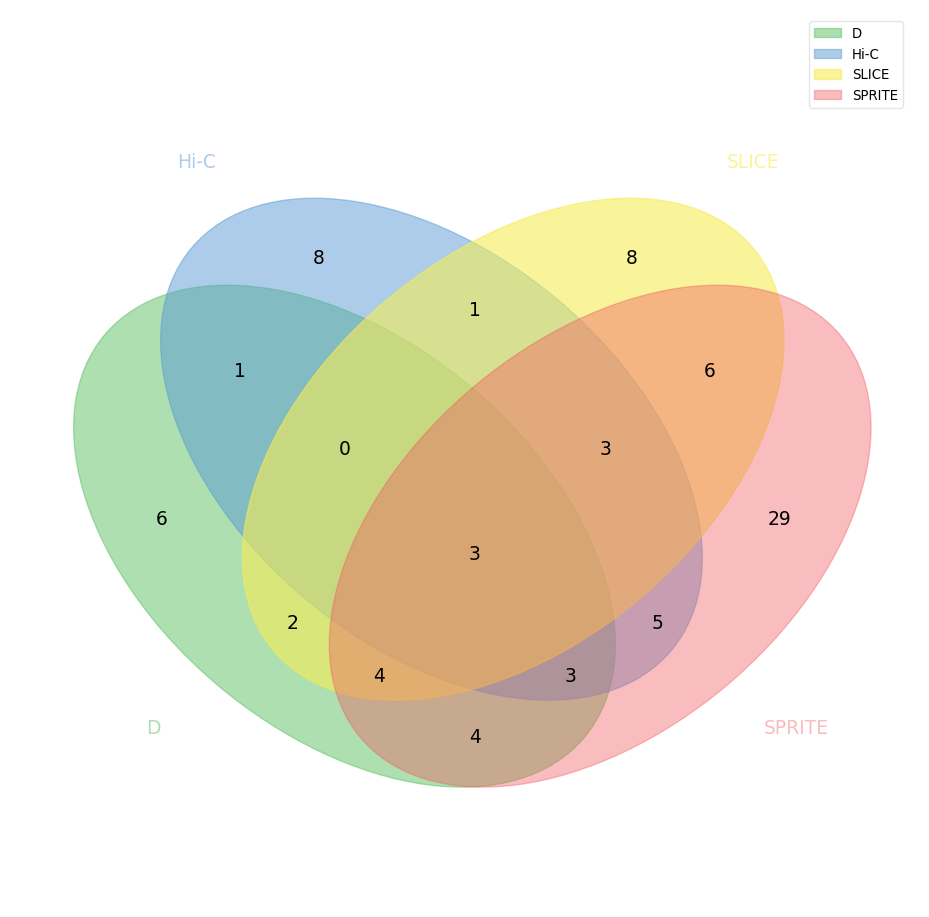

{'SP4-PRDM5', 'EGR1-KLF6', 'ZBT17-PRDM5'}
promoter-promoter
D
Hi-C
SLICE
SPRITE


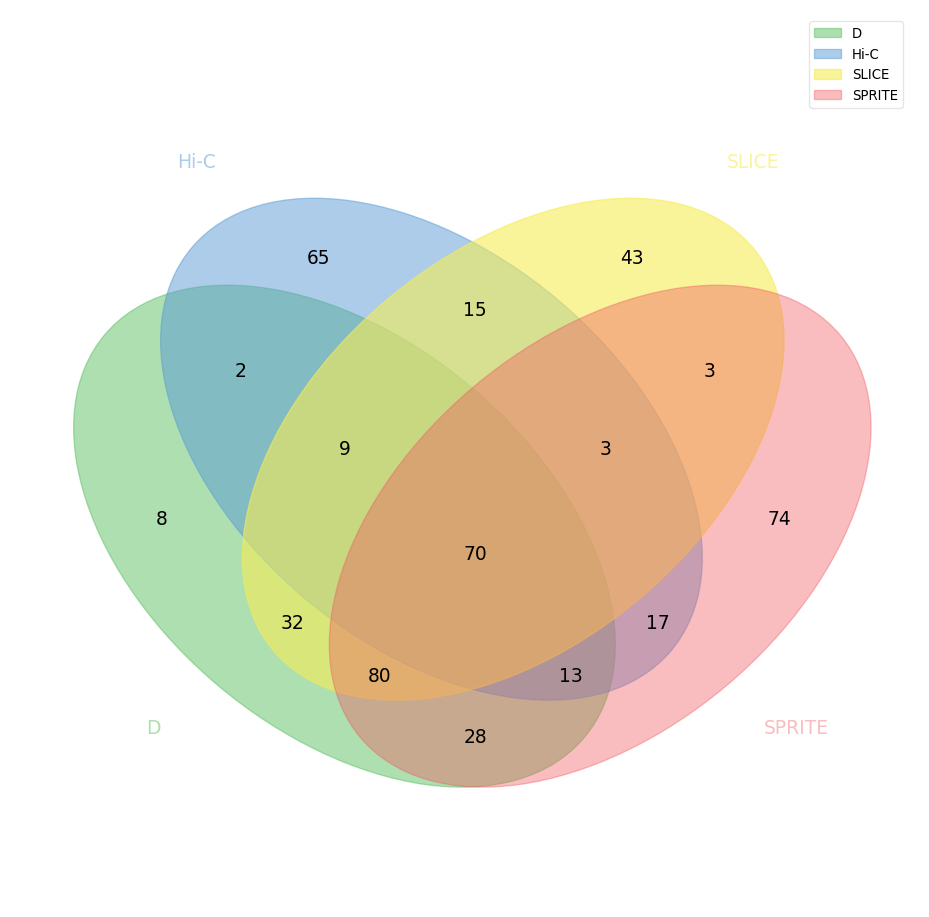

{'STA5B-SP2', 'SMAD2-SALL4', 'TF7L2-ZBT17', 'ZBT17-BACH1', 'SMAD2-MAZ', 'ZN322-ZBT17', 'STA5B-E2F4', 'PKNX1-PRDM5', 'BACH1-SP1', 'PKNX1-KLF5', 'KLF15-SMAD2', 'KLF15-BACH1', 'PKNX1-KLF3', 'PRDM5-ZN281', 'SMAD2-KLF3', 'TF7L2-SP2', 'SP2-ZIC3', 'PBX3-SP3', 'PBX1-MAZ', 'BACH1-MAZ', 'BACH1-SP2', 'STA5B-SALL4', 'ATF3-SP2', 'ZN322-SP3', 'SP3-ZIC3', 'SMAD2-KLF4', 'SP2-PRDM5', 'STA5B-SP1', 'ZBT17-ZIC3', 'PKNX1-E2F4', 'STA5B-ZBT17', 'ZBT17-ZN281', 'TF7L2-MAZ', 'PBX1-PRDM5', 'ZN322-SP1', 'PKNX1-MAZ', 'ZN322-KLF5', 'STA5B-KLF4', 'PBX1-KLF3', 'ZN322-PRDM5', 'SP4-ZN322', 'BACH1-KLF3', 'ZBT17-PRDM5', 'PBX3-ZBT17', 'EGR1-ZIC3', 'SP4-ZIC3', 'STA5B-KLF3', 'STA5B-MAZ', 'KLF6-RARG', 'STA5B-WT1', 'ZN322-KLF3', 'JUND-MAZ', 'STA5B-KLF5', 'PBX1-SP3', 'BACH1-KLF5', 'ZN322-MAZ', 'EGR1-STA5B', 'EGR1-ZN322', 'TCF7-MAZ', 'STA5B-E2F7', 'PBX3-SP2', 'ZBT17-KLF6', 'PKNX1-SALL4', 'ZN322-SP2', 'STA5B-KLF15', 'TF7L2-KLF3', 'PKNX1-SP3', 'BCL6-KLF15', 'ZIC3-MAZ', 'PBX3-MAZ'}
promoter-enhancer
D
Hi-C
SLICE
SPRITE


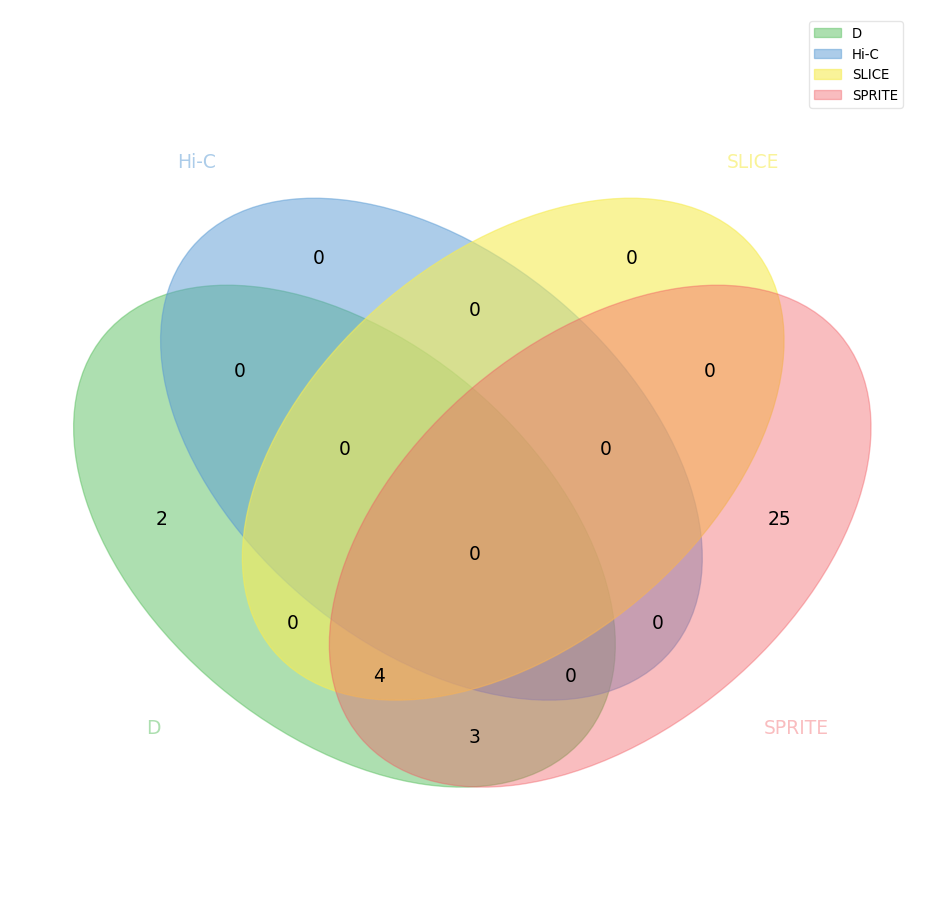

set()
enhancer-insulator
D
enhancer-promoter
D
enhancer-enhancer
D
Hi-C
SLICE
SPRITE


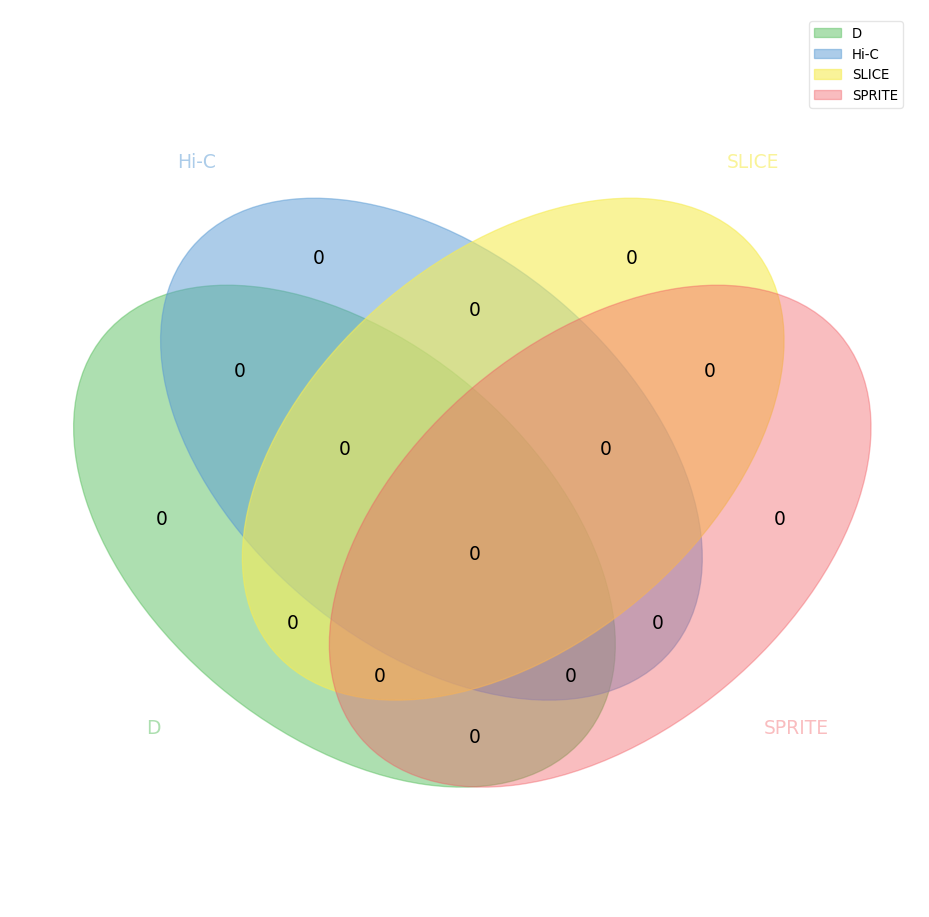

set()


In [17]:
import matplotlib.pyplot as plt
file_list = ['D','Hi-C','SLICE','SPRITE']
state_list = ['insulator','promoter','enhancer']
for s1 in state_list:
    for s2 in state_list:
        pair = s1+"-"+s2
        print (pair)
        try:
            enriched_motif_list = []
            for x in file_list:
                print (x)
                file = x+"/9_6_2018."+pair+".enriched.MP.csv"
                df = pd.read_csv(file)
                df = df[(df.Ratio >= 1.5) & (df.ForeCov >= 0.3) & (df.DiffCov >= 0.1)]
                motif_list1 = df.Row.apply(lambda x:x.split("_")[0].replace("mm9.","")) + "-" +  df.Column.apply(lambda x:x.split("_")[0].replace("mm9.",""))
#                 print (motif_list1.tolist())
#                 result = list(set(motif_list1).intersection(motif_list2))
                enriched_motif_list.append(motif_list1)
            
            labels = venn.get_labels(enriched_motif_list, fill=['number'])
            label_list = list(map(lambda x:x.replace("D_norm","D'"),file_list)) 
            plt.figure()
            fig, ax = venn.venn4(labels, names=label_list)
#             fig.close()
#             plt.close(fig)
            plt.show()
            plt.close()
            print (set(enriched_motif_list[0]).intersection(*enriched_motif_list))
        except:
            continue